In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [61]:
pd.set_option('display.max_columns', None)

In [62]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [63]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,pareena mi casa,sector 68,1.90,9228.0,2059.0,Carpet area: 2059 (191.29 sq.m.),3,3,3+,1.0,NaN,Under Construction,NaN,NaN,2059.0,0,1,0,0,0,0,49,686.333333
1,flat,alpha corp gurgaonone,sector 84,2.28,8769.0,2600.0,Super Built up area 3434(319.03 sq.m.)Carpet a...,4,4,3+,8.0,South-East,Relatively New,3434.0,NaN,2600.0,0,1,0,0,0,0,61,650.000000
2,flat,m3m sierra 68,sector 68,1.10,8987.0,1224.0,Super Built up area 1224(113.71 sq.m.)Built Up...,2,2,3,1.0,North-East,Relatively New,1224.0,1150.0,830.0,0,0,0,0,0,1,127,612.000000
3,house,ireo victory valley4.0 ?,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,3.0,North-East,Moderately Old,NaN,400.0,NaN,1,1,1,1,0,1,151,600.000000
4,flat,kiran residency,sector 56,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3,4,3+,5.0,South,Old Property,2000.0,1900.0,1850.0,0,1,0,0,0,0,98,616.666667


In [64]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1670
built_up_area          1964
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

#### **Built up area**

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

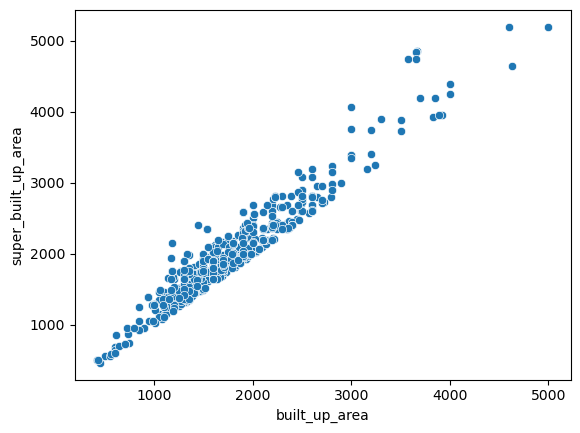

In [65]:
sns.scatterplot(
    x = df['built_up_area'],
    y = df['super_built_up_area']
)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

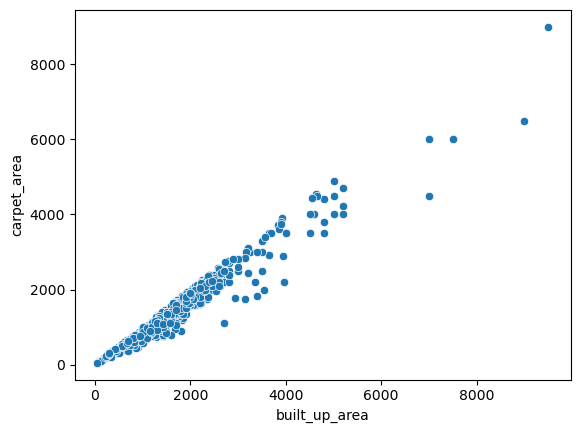

In [66]:
sns.scatterplot(
    x = df['built_up_area'],
    y = df['carpet_area']
)

In [67]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3540    False
3541    False
3542    False
3543    False
3544    False
Length: 3545, dtype: bool

In [68]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [69]:
all_present_df.shape

(531, 24)

In [70]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [71]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [72]:
print(super_to_built_up_ratio , carpet_to_built_up_ratio)

1.105263157894737 0.9


In [73]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [74]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,alpha corp gurgaonone,sector 84,2.28,8769.0,2600.0,Super Built up area 3434(319.03 sq.m.)Carpet a...,4,4,3+,8.0,South-East,Relatively New,3434.0,NaN,2600.00,0,1,0,0,0,0,61,650.000000
10,flat,aipl the peaceful homes,sector 70a,2.80,11915.0,2350.0,Super Built up area 2350(218.32 sq.m.)Carpet a...,3,4,3,22.0,North-East,Relatively New,2350.0,NaN,1322.00,0,1,0,0,0,0,49,783.333333
13,flat,m3m heights,sector 65,2.01,13499.0,1489.0,Super Built up area 1516(140.84 sq.m.)Carpet a...,2,2,3,8.0,North-East,New Property,1516.0,NaN,1433.00,1,0,0,0,0,0,44,744.500000
16,flat,hero homes,sector 104,1.35,9568.0,1411.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,3,2,2,18.0,East,New Property,1359.0,NaN,861.97,0,0,0,0,0,0,49,470.333333
23,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4,5,3+,22.0,West,Relatively New,2905.0,NaN,2495.00,0,1,0,0,0,1,174,623.750000


In [75]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\Mr\AppData\Local\Temp\ipykernel_26028\1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\Mr\AppData\Local\Temp\ipykernel_26028\1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s

In [76]:
df.update(sbc_df)

In [77]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1670
built_up_area          1543
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [78]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [79]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,flat,tulip petals,sector 89,1.55,10000.0,1550.0,Super Built up area 1550(144 sq.m.),3,2,3,6.0,East,Moderately Old,1550.0,NaN,NaN,0,0,1,0,0,1,111,516.666667
11,flat,antriksh heights,sector 84,0.85,5556.0,1530.0,Super Built up area 1350(125.42 sq.m.),2,2,3,10.0,North-West,New Property,1350.0,NaN,NaN,1,0,0,0,1,0,24,765.000000
14,flat,emaar mgf palm hills,sector 77,1.09,5383.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,4,3+,5.0,South,Relatively New,2025.0,NaN,NaN,0,1,0,0,1,0,167,675.000000
18,flat,conscient heritage max,sector 102,2.10,9772.0,2149.0,Super Built up area 2149(199.65 sq.m.),3,4,3+,10.0,East,Relatively New,2149.0,NaN,NaN,1,1,0,0,0,0,53,716.333333
24,flat,la vida by tata housing,sector 113,1.93,12223.0,1579.0,Super Built up area 1579(146.69 sq.m.),3,3,2,8.0,NaN,Under Construction,1579.0,NaN,NaN,0,0,0,0,0,0,71,526.333333


In [80]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)

C:\Users\Mr\AppData\Local\Temp\ipykernel_26028\1215299602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)
C:\Users\Mr\AppData\Local\Temp\ipykernel_26028\1215299602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb

In [81]:
df.update(sb_df)

In [82]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1670
built_up_area           668
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [83]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]


In [84]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,pareena mi casa,sector 68,1.90,9228.0,2059.0,Carpet area: 2059 (191.29 sq.m.),3,3,3+,1.0,NaN,Under Construction,NaN,NaN,2059.000000,0,1,0,0,0,0,49,686.333333
5,flat,rof ananda,sector 95,0.38,5901.0,644.0,Carpet area: 644.12 (59.84 sq.m.),2,2,2,5.0,NaN,Relatively New,NaN,NaN,644.111776,1,0,0,0,0,0,83,322.000000
6,flat,valley view estate,gwal pahari,1.50,8278.0,1812.0,Carpet area: 1812 (168.34 sq.m.),4,4,3+,9.0,North,Old Property,NaN,NaN,1812.000000,1,1,0,0,1,0,135,453.000000
15,flat,the close south,sector 50,3.25,12810.0,2537.0,Carpet area: 2537 (235.7 sq.m.),3,4,3+,4.0,South-East,Old Property,NaN,NaN,2537.000000,0,1,0,0,0,1,135,845.666667
27,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,11.0,East,New Property,NaN,NaN,634.000000,0,0,0,0,0,2,97,317.000000


In [85]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)

C:\Users\Mr\AppData\Local\Temp\ipykernel_26028\3473321853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)
C:\Users\Mr\AppData\Local\Temp\ipykernel_26028\3473321853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_ar

In [86]:
df.update(c_df)

In [87]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1670
built_up_area             0
carpet_area            1713
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

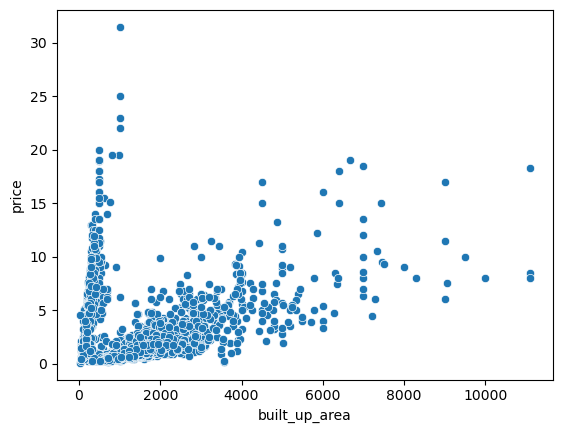

In [88]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [89]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price', 'area', 'built_up_area']]

In [90]:
anamoly_df.sample(5)

,price,area,built_up_area
1589,9.40,3600.0,400.0
48,9.50,3600.0,400.0
2573,2.55,2273.0,1773.0
2322,5.50,2340.0,260.0
1926,3.87,2250.0,1712.0


In [91]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [92]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

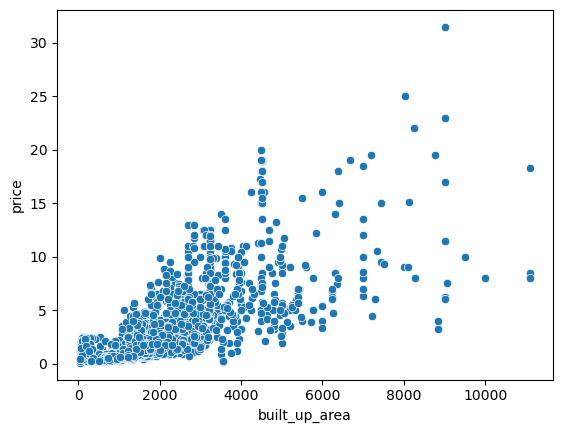

In [93]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

In [94]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [95]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,pareena mi casa,sector 68,1.90,9228.0,3,3,3+,1.0,NaN,Under Construction,2288.0,0,1,0,0,0,0,49
1,flat,alpha corp gurgaonone,sector 84,2.28,8769.0,4,4,3+,8.0,South-East,Relatively New,2998.0,0,1,0,0,0,0,61
2,flat,m3m sierra 68,sector 68,1.10,8987.0,2,2,3,1.0,North-East,Relatively New,1150.0,0,0,0,0,0,1,127
3,house,ireo victory valley4.0 ?,sector 67,8.00,22222.0,6,7,3+,3.0,North-East,Moderately Old,3600.0,1,1,1,1,0,1,151
4,flat,kiran residency,sector 56,1.54,8324.0,3,4,3+,5.0,South,Old Property,1900.0,0,1,0,0,0,0,98


In [96]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

#### **floorNum**

In [97]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
714,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
1240,house,ansal sushant lok plots4.1 ?,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1430,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1516,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
1578,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1592,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
1823,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,60.0,0,0,0,0,0,0,9
2370,house,dlf new town heights 24.0 ?,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130
2512,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
2520,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0


In [98]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [99]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\Mr\AppData\Local\Temp\ipykernel_26028\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [100]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [101]:
1011/df.shape[0]

0.2851904090267983

#### **facing**

<Axes: ylabel='count'>

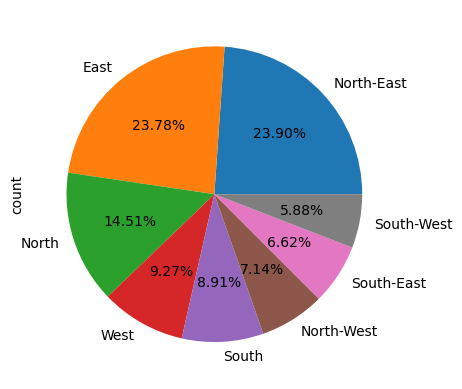

In [102]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [103]:
df.drop(columns=['facing'],inplace=True)

In [104]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3475,flat,experion the heartsong,sector 108,1.25,9259.0,3,3,3,1.0,Relatively New,1500.0,0,1,0,1,0,0,174
1806,flat,zara aavaas,sector 104,0.65,8519.0,3,2,2,7.0,New Property,848.0,0,0,0,0,0,0,65
3315,flat,ireo skyon,sector 60,2.05,15185.0,2,3,2,2.0,Relatively New,1520.0,0,0,1,0,0,1,174
455,flat,m3m capital,sector 113,2.57,15576.0,4,5,3+,25.0,Under Construction,2060.0,1,0,0,0,0,1,79
3490,flat,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,Undefined,1570.0,0,0,0,0,0,0,0


In [105]:
df[df['society'].isnull()].index


Index([714], dtype='int64')

In [106]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [107]:
df.drop(index=[714],inplace=True)

In [108]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

#### **agePossession**

In [109]:
df['agePossession'].value_counts()

agePossession
Relatively New        1603
New Property           555
Moderately Old         541
Old Property           292
Undefined              291
Under Construction     262
Name: count, dtype: int64

In [110]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
7,flat,smart world gems,sector 89,1.20,8433.0,3,3,2,2.0,Undefined,1423.0,0,0,0,0,0,0,45
12,house,independent,sector 3,0.90,8929.0,3,3,0,2.0,Undefined,112.0,0,0,0,0,0,0,0
21,flat,smart world gems,sector 89,0.90,8145.0,2,2,2,1.0,Undefined,1105.0,0,0,0,0,0,0,45
34,house,independent,sector 105,1.30,11556.0,3,3,1,1.0,Undefined,1125.0,0,0,0,0,0,0,0
50,flat,gls arawali homes,sohna road,0.32,6723.0,2,1,0,0.0,Undefined,476.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,house,independent,sector 31,4.60,32258.0,2,2,2,2.0,Undefined,1426.0,0,0,0,0,0,0,0
3490,flat,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,Undefined,1570.0,0,0,0,0,0,0,0
3492,flat,signature global solera,sector 107,0.25,7862.0,1,1,0,0.0,Undefined,318.0,0,0,0,0,0,0,55
3497,flat,housing apna enclave,sector 4,0.39,4105.0,2,2,1,1.0,Undefined,950.0,0,0,0,0,0,0,0


In [116]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # if mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [117]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [119]:
df['agePossession'].value_counts()

agePossession
Relatively New        1714
New Property           595
Moderately Old         580
Old Property           325
Under Construction     276
Undefined               54
Name: count, dtype: int64

In [120]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [121]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [122]:
df['agePossession'].value_counts()

agePossession
Relatively New        1723
New Property           596
Moderately Old         587
Old Property           328
Under Construction     276
Undefined               34
Name: count, dtype: int64

In [123]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']


In [124]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [125]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
Moderately Old         618
New Property           596
Old Property           328
Under Construction     276
Name: count, dtype: int64

In [129]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


In [126]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [127]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [128]:
df.shape

(3544, 18)